In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/smc_caqtls/ATAC_sig_only/summary.mean.variant_scores_new.tsv", sep="\t", header=0)



In [4]:
data.head()


,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,max_percentile.mean,max_percentile.mean.pval,logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean,abs_logfc_x_max_percentile.mean.pval,jsd_x_max_percentile.mean,jsd_x_max_percentile.mean.pval,abs_logfc_x_jsd_x_max_percentile.mean,abs_logfc_x_jsd_x_max_percentile.mean.pval,logfc_x_jsd_x_max_percentile.mean
0,chr1,1067006,A,G,"chr1.1069225.1069626,rs74048003,chr1,1067007,A...",0.012438,0.012438,0.711651,0.008485,0.633040,...,0.647317,0.099589,0.008754,0.008754,0.411708,0.005484,0.202760,0.000074,0.450384,0.000074
1,chr1,108121218,C,G,"chr1.108118484.108118885,rs665659,chr1,1081212...",0.041139,0.047367,0.359769,0.010933,0.435650,...,0.598538,0.131345,0.025264,0.028927,0.179629,0.006550,0.161457,0.000367,0.223157,0.000349
2,chr1,108721446,C,T,"chr1.108721337.108721738,rs4970806,chr1,108721...",-0.385952,0.385952,0.054076,0.033347,0.068628,...,0.552190,0.145471,-0.216115,0.216115,0.044334,0.018451,0.044910,0.007501,0.043301,-0.007501
3,chr1,108842307,G,C,"chr1.108841698.108842099,rs34272714,chr1,10884...",-0.050323,0.067884,0.270938,0.016801,0.206538,...,0.392109,0.243125,-0.022675,0.027942,0.187469,0.006705,0.156719,0.000504,0.172519,-0.000420
4,chr1,109272629,A,G,"chr1.109274794.109275195,rs611917,chr1,1092726...",-0.057165,0.064350,0.295698,0.011112,0.424988,...,0.525791,0.154781,-0.028945,0.032736,0.146229,0.005768,0.184183,0.000397,0.208487,-0.000372


In [5]:
snps2=pd.read_csv("/oak/stanford/groups/akundaje/projects/cad/data/clint_data/rasqual_results/revisions/smc/SMC_rasqual_results_FDR_0.05_083121.txt", sep="\t", header=0)
data[snps2.columns] = data["rsid"].str.split(",", expand=True)
data[snps2.columns].head()

,Feature_ID,rsID,Chromosome,SNP_position,Ref_allele,Alt_allele,Freq,HWE_Chisquare,Imp_quality,Log10_BH_Q,...,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,chr1.1069225.1069626,rs74048003,chr1,1067007,A,G,0.2,0.15625,0.999916,-4.9209610126,...,4881,NM--001205252,401934.0,Hs.568137,NM--001205252,ENSG00000237330,RNF223,-,ring finger protein 223,protein-coding
1,chr1.108118484.108118885,rs665659,chr1,108121219,C,G,0.725,0.000393,0.999935,-4.1185720043,...,74124,NM--213651,29957.0,Hs.656870,NM--013386,ENSG00000085491,SLC25A24,APC1|SCAMC-1|SCAMC1,solute carrier family 25 member 24,protein-coding
2,chr1.108721337.108721738,rs4970806,chr1,108721447,C,T,0.6625,5.930399,0.999939,-9.2669001138,...,8604,NM--001144937,163479.0,Hs.258253,NM--173532,ENSG00000143107,FNDC7,-,fibronectin type III domain containing 7,protein-coding
3,chr1.108841698.108842099,rs34272714,chr1,108842308,G,C,0.1375,1.016593,0.999885,-4.7210822228,...,15205,NM--152763,254268.0,Hs.729441,NM--152763,ENSG00000162641,AKNAD1,C1orf62,AKNA domain containing 1,protein-coding
4,chr1.109274794.109275195,rs611917,chr1,109272630,A,G,0.275,5.566376,0.999931,-3.0064302646,...,8149,NM--001350237,84722.0,Hs.405925,NM--032636,ENSG00000134222,PSRC1,DDA3|FP3214,proline and serine rich coiled-coil 1,protein-coding


In [6]:
import matplotlib.pyplot as plt

In [7]:
data.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'max_percentile.mean', 'max_percentile.mean.pval',
       'logfc_x_max_percentile.mean', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 'Feature_ID', 'rsID', 'Chromosome',
       'SNP_position', 'Ref_allele', 'Alt_allele', 'Freq', 'HWE_Chisquare',
       'Imp_quality', 'Log10_BH_Q', 'Chisquare', 'Effect_size', 'Delta', 'Phi',
       'Overdispersion', 'SNP_id_region', 'Num_feature_SNPs',
       'Num_tested_SNPs', 'Num_iterations_null', 'Num_iterations_alt',
       'Random_ties', 'Log_likelihood_null', 'Convergence_st

In [8]:
import numpy as np
data["jsd_sign"] = data["jsd.mean"]*np.sign(data["logfc.mean"])

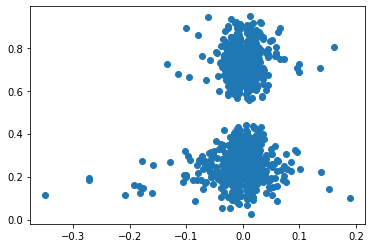

In [11]:
plt.scatter(data["jsd_sign"], data["Effect_size"].astype(float))

In [10]:
data.shape

(1984, 71)

In [22]:
orig = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/smc_caqtls/preds_fold0/snp_scores_bed_format_inpeaks.bed", sep="\t", header=None)
orig[snps2.columns] = orig[5].str.split(",", expand=True)


#orig.columns.tolist()

In [26]:
len(set(orig["rsID"]))

378

In [27]:
orig.shape

(386, 103)

In [30]:
data_sub = data[data["rsID"].isin(orig["rsID"])].drop_duplicates()

In [31]:
data_sub.shape

(386, 71)

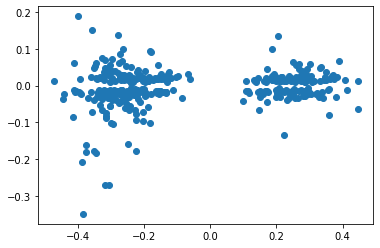

In [34]:
plt.scatter(data_sub["Effect_size"].astype(float)-0.5, data_sub["c"])

In [37]:
orig1 = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/variant_data/smc_caqtls/preds_fold0/snp_scores.tsv", sep="\t")

In [41]:
orig1

,CHR,POS0,REF,ALT,META_DATA,log_counts_diff,log_probs_diff_abs_sum,probs_jsd_diff
0,chr1,1067006,A,G,"chr1.1069225.1069626,rs74048003,chr1,1067007,A...",0.004163,21.698868,0.010776
1,chr1,108121218,C,G,"chr1.108118484.108118885,rs665659,chr1,1081212...",0.031985,43.484390,0.015882
2,chr1,108721446,C,T,"chr1.108721337.108721738,rs4970806,chr1,108721...",0.057148,64.174970,0.027431
3,chr1,108842307,G,C,"chr1.108841698.108842099,rs34272714,chr1,10884...",-0.584036,-177.593690,-0.083053
4,chr1,109272629,A,G,"chr1.109274794.109275195,rs611917,chr1,1092726...",0.040285,18.861065,0.009404
...,...,...,...,...,...,...,...,...
1979,chr9,96159156,C,T,"chr9.96158892.96159293,rs10989490,chr9,9615915...",-0.186676,-59.410150,-0.030048
1980,chr9,96178224,G,A,"chr9.96177807.96178208,rs13290534,chr9,9617822...",-0.010329,-9.612026,-0.004957
1981,chr9,97227899,A,T,"chr9.97221487.97221888,rs191093948,chr9,972279...",-0.000656,-12.787620,-0.006819
1982,chr9,98873906,T,C,"chr9.98874108.98874509,rs34605975,chr9,9887390...",-0.012841,-10.054989,-0.004247


In [39]:
new1 = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/smc_caqtls/ATAC_sig_only/fold_0.variant_scores.tsv.variant_scores.tsv", sep="\t")

In [40]:
new1

,chr,pos,allele1,allele2,rsid,allele1_pred_counts,allele2_pred_counts,logfc,abs_logfc,jsd,...,percentile_change,abs_percentile_change,abs_logfc_x_max_percentile,jsd_x_max_percentile,abs_logfc_x_jsd_x_max_percentile,max_percentile.pval,abs_percentile_change.pval,abs_logfc_x_max_percentile.pval,jsd_x_max_percentile.pval,abs_logfc_x_jsd_x_max_percentile.pval
0,chr1,1067006,A,G,"chr1.1069225.1069626,rs74048003,chr1,1067007,A...",2875.01170,2915.42290,0.020137,0.020137,0.010118,...,0.003275,0.003275,0.015014,0.007544,1.519090e-04,0.059406,0.455446,0.227723,0.118812,0.257426
1,chr1,108121218,C,G,"chr1.108118484.108118885,rs665659,chr1,1081212...",1423.06850,1454.19570,0.031216,0.031216,0.012827,...,0.007763,0.007763,0.016589,0.006817,2.127885e-04,0.168317,0.267327,0.207921,0.118812,0.217822
2,chr1,108721446,C,T,"chr1.108721337.108721738,rs4970806,chr1,108721...",1221.47170,1020.22780,-0.259729,0.259729,0.029336,...,-0.060784,0.060784,0.122927,0.013885,3.606239e-03,0.178218,0.059406,0.059406,0.059406,0.049505
3,chr1,108842307,G,C,"chr1.108841698.108842099,rs34272714,chr1,10884...",686.11444,707.31396,0.043902,0.043902,0.016056,...,0.008180,0.008180,0.013167,0.004816,2.114165e-04,0.306931,0.247525,0.257426,0.227723,0.217822
4,chr1,109272629,A,G,"chr1.109274794.109275195,rs611917,chr1,1092726...",1569.47630,1500.74940,-0.064600,0.064600,0.014030,...,-0.015092,0.015092,0.035985,0.007815,5.048795e-04,0.148515,0.168317,0.108911,0.118812,0.158416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,chr9,96159156,C,T,"chr9.96158892.96159293,rs10989490,chr9,9615915...",801.73620,610.06824,-0.394157,0.394157,0.022057,...,-0.076597,0.076597,0.132497,0.007415,2.922521e-03,0.287129,0.049505,0.059406,0.118812,0.059406
1980,chr9,96178224,G,A,"chr9.96177807.96178208,rs13290534,chr9,9617822...",652.00160,634.74410,-0.038700,0.038700,0.009030,...,-0.007034,0.007034,0.010733,0.002504,9.692000e-05,0.306931,0.287129,0.287129,0.495050,0.336634
1981,chr9,97227899,A,T,"chr9.97221487.97221888,rs191093948,chr9,972279...",123.24780,124.43193,0.013795,0.013795,0.006632,...,0.000368,0.000368,0.000135,0.000065,8.922109e-07,0.920792,0.881188,0.940594,0.940594,0.960396
1982,chr9,98873906,T,C,"chr9.98874108.98874509,rs34605975,chr9,9887390...",4753.75500,4628.65800,-0.038473,0.038473,0.007962,...,-0.004594,0.004594,0.032622,0.006751,2.597451e-04,0.039604,0.376238,0.118812,0.118812,0.207921


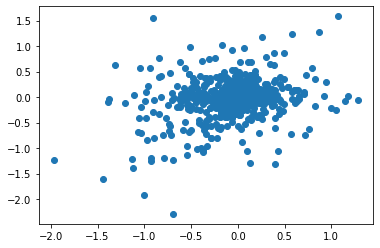

In [42]:
plt.scatter(orig1["log_counts_diff"], new1["logfc"])

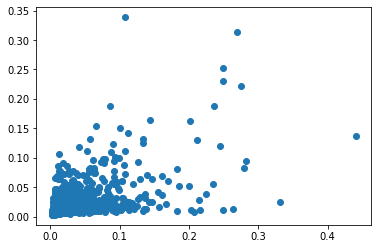

In [44]:
plt.scatter(np.abs(orig1["probs_jsd_diff"]), new1["jsd"])

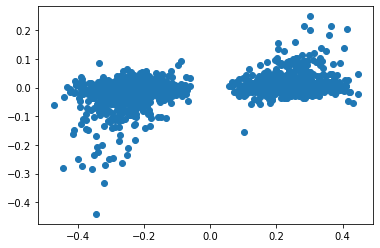

In [47]:
plt.scatter(data["Effect_size"].astype(float)-0.5, orig1["probs_jsd_diff"])

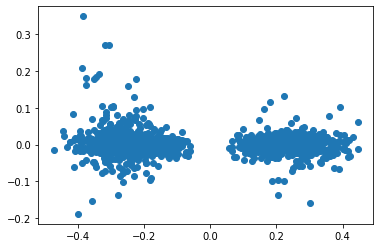

In [49]:
plt.scatter(data["Effect_size"].astype(float)-0.5, data["jsd_sign"]*-1)

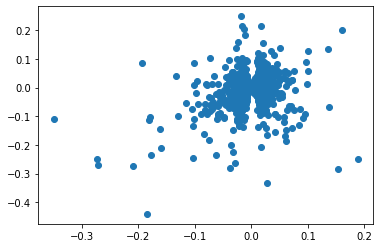

In [52]:
plt.scatter(data["jsd_sign"].astype(float), orig1["probs_jsd_diff"])

In [53]:
import scipy.stats 

In [54]:
scipy.stats.pearsonr(data["jsd_sign"].astype(float), orig1["probs_jsd_diff"]) 

(0.2759389438584132, 5.3032321012145504e-36)

In [55]:
scipy.stats.pearsonr(data["Effect_size"].astype(float), orig1["probs_jsd_diff"]) 

(0.36329326141682444, 5.937776945644532e-63)

In [57]:
scipy.stats.pearsonr(data["Effect_size"].astype(float), data["jsd_sign"]) 

(0.08573277909843935, 0.00013164877878463278)